## Understand The Problem Statement & Business Case

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

- Marketing is crucial for the growth and sustainability of any business.
- Marketers can help build the company’s brand, engage customers, grow revenue, and increase sales.


- One of the key pain points for marketers is to know their customers and identify their needs.
- By understanding the customer, marketers can launch a targeted marketing campaign that is tailored for specific needs.
- If data about the customers is available, data science can be applied to perform market segmentation. 

- In this case study, you have been hired as a consultant to a bank in New York City. 
- The bank has extensive data on their customers for the past 6 months. 
- The marketing team at the bank wants to launch a targeted ad marketing campaign by dividing their customers into at least 3 distinctive groups.  


## Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')


In [ ]:
creditcard_df = pd.read_csv('Customer Segmentation Analysis/Customer Segmentation Analysis.csv')

### Data Dictionary:

CUSTID: Identification of Credit Card holder

BALANCE: Balance amount left in customer's account to make purchases

BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES: Amount of purchases made from account

ONEOFFPURCHASES: Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES: Amount of purchase done in installment

CASH_ADVANCE: Cash in advance given by the user

PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid

CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"

PURCHASES_TRX: Number of purchase transactions made

CREDIT_LIMIT: Limit of Credit Card for user

PAYMENTS: Amount of Payment done by user

MINIMUM_PAYMENTS: Minimum amount of payments made by user

PRC_FULL_PAYMENT: Percent of full payment paid by user

TENURE: Tenure of credit card service for user

In [3]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
creditcard_df.info()
creditcard_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


* Mean balance is $1564
* Balance frequency is frequently updated on average ~0.9
* Purchases average is $1000
* One off purchase average is ~$600
* Average purchases frequency is around 0.5
* Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
* Average credit limit ~ 4500
* Percent of full payment is 15%
* Average tenure is 11 years

In [5]:
# Taking a look at the record details with the one off purchase amount of 40761.25
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [7]:
# Taking a look at the record details with the cash advance of $47137.21
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

# This customer made 123 cash advance transactions
# Never paid credit card in full

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Visualize & Explore Dataset

<Axes: >

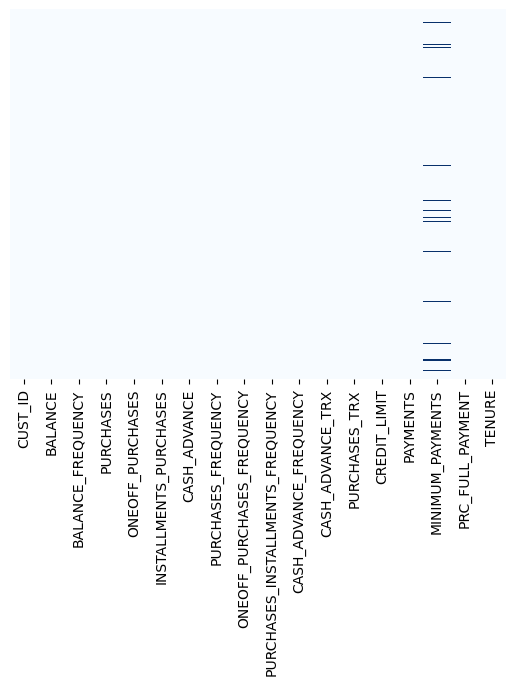

In [8]:
# Verifying if we have any missing data
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [9]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()== True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [11]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()== True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

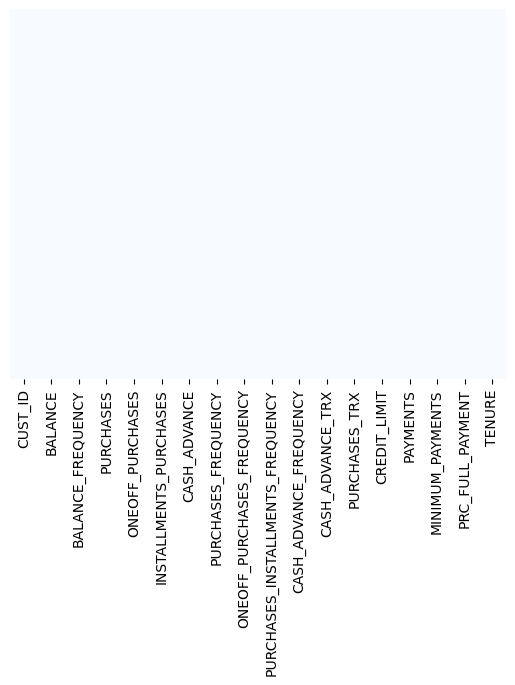

In [12]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [13]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
# Verifying if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [15]:
# Dropped Customer ID since it has no meaning here
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [16]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
n =len(creditcard_df.columns)
print('The number of columns in the dataset is:', n)

The number of columns in the dataset is: 17


In [18]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

Distplot combines the matplotlib.hist function with seaborn kdeplot()

KDE Plot represents the Kernel Density Estimate

KDE is used for visualizing the Probability Density of a continuous variable.

KDE demonstrates the probability density at different values in a continuous variable.

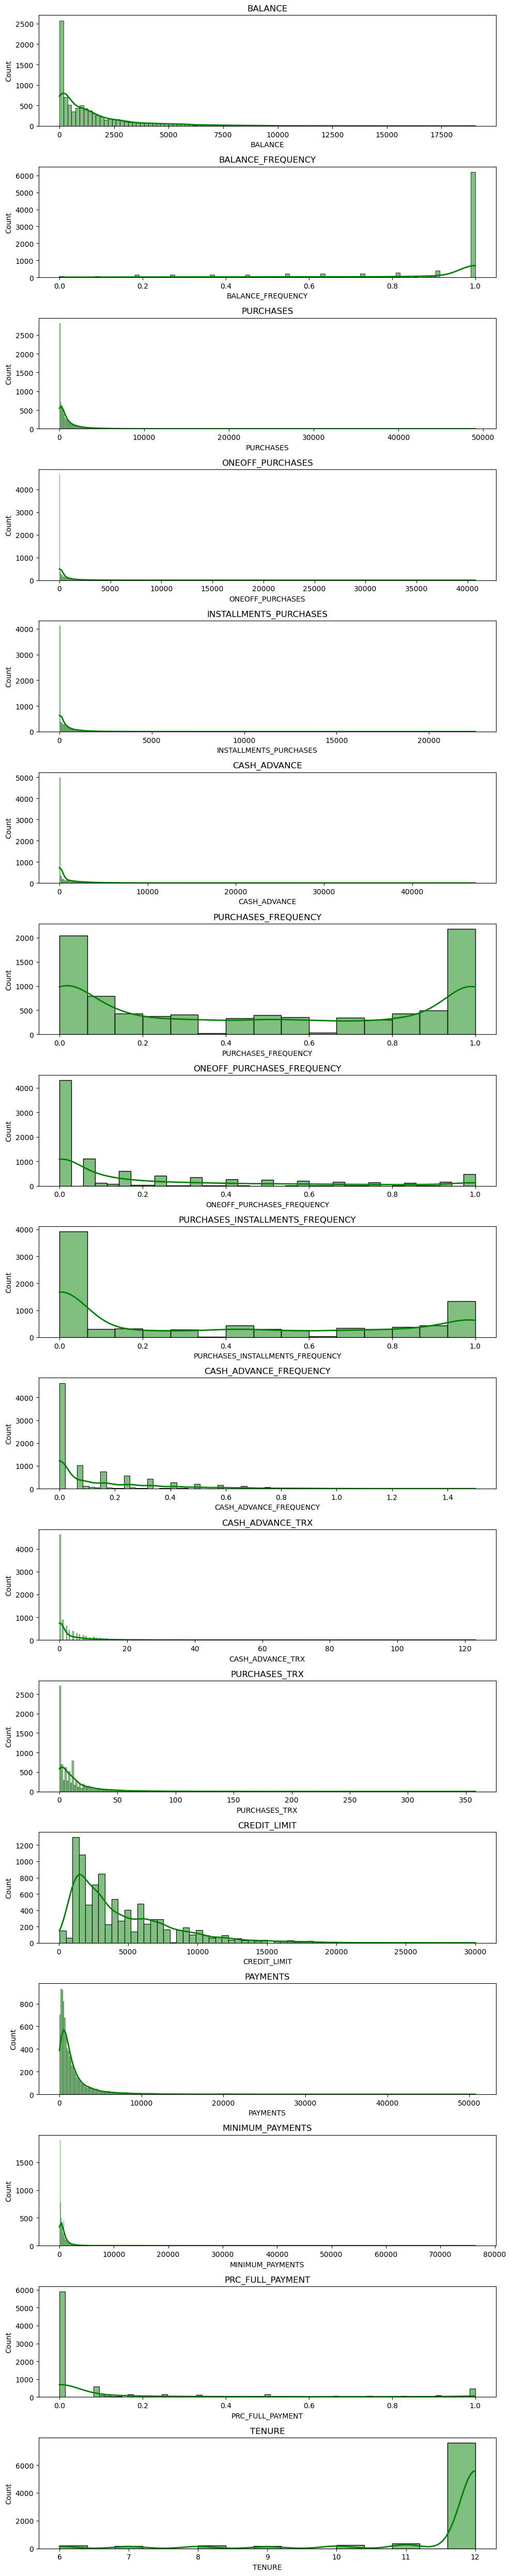

In [19]:
plt.figure(figsize=(10, 50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.histplot(creditcard_df[creditcard_df.columns[i]], kde=True, color='g', line_kws={'linewidth': 2})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

* Mean of balance is $1500
* 'Balance_Frequency' for most customers is updated frequently ~1
* For 'PURCHASES_FREQUENCY', there are two distinct group of customers
* For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently
* Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
* Credit limit average is around $4500
* Most customers are ~11 years tenure


<Axes: >

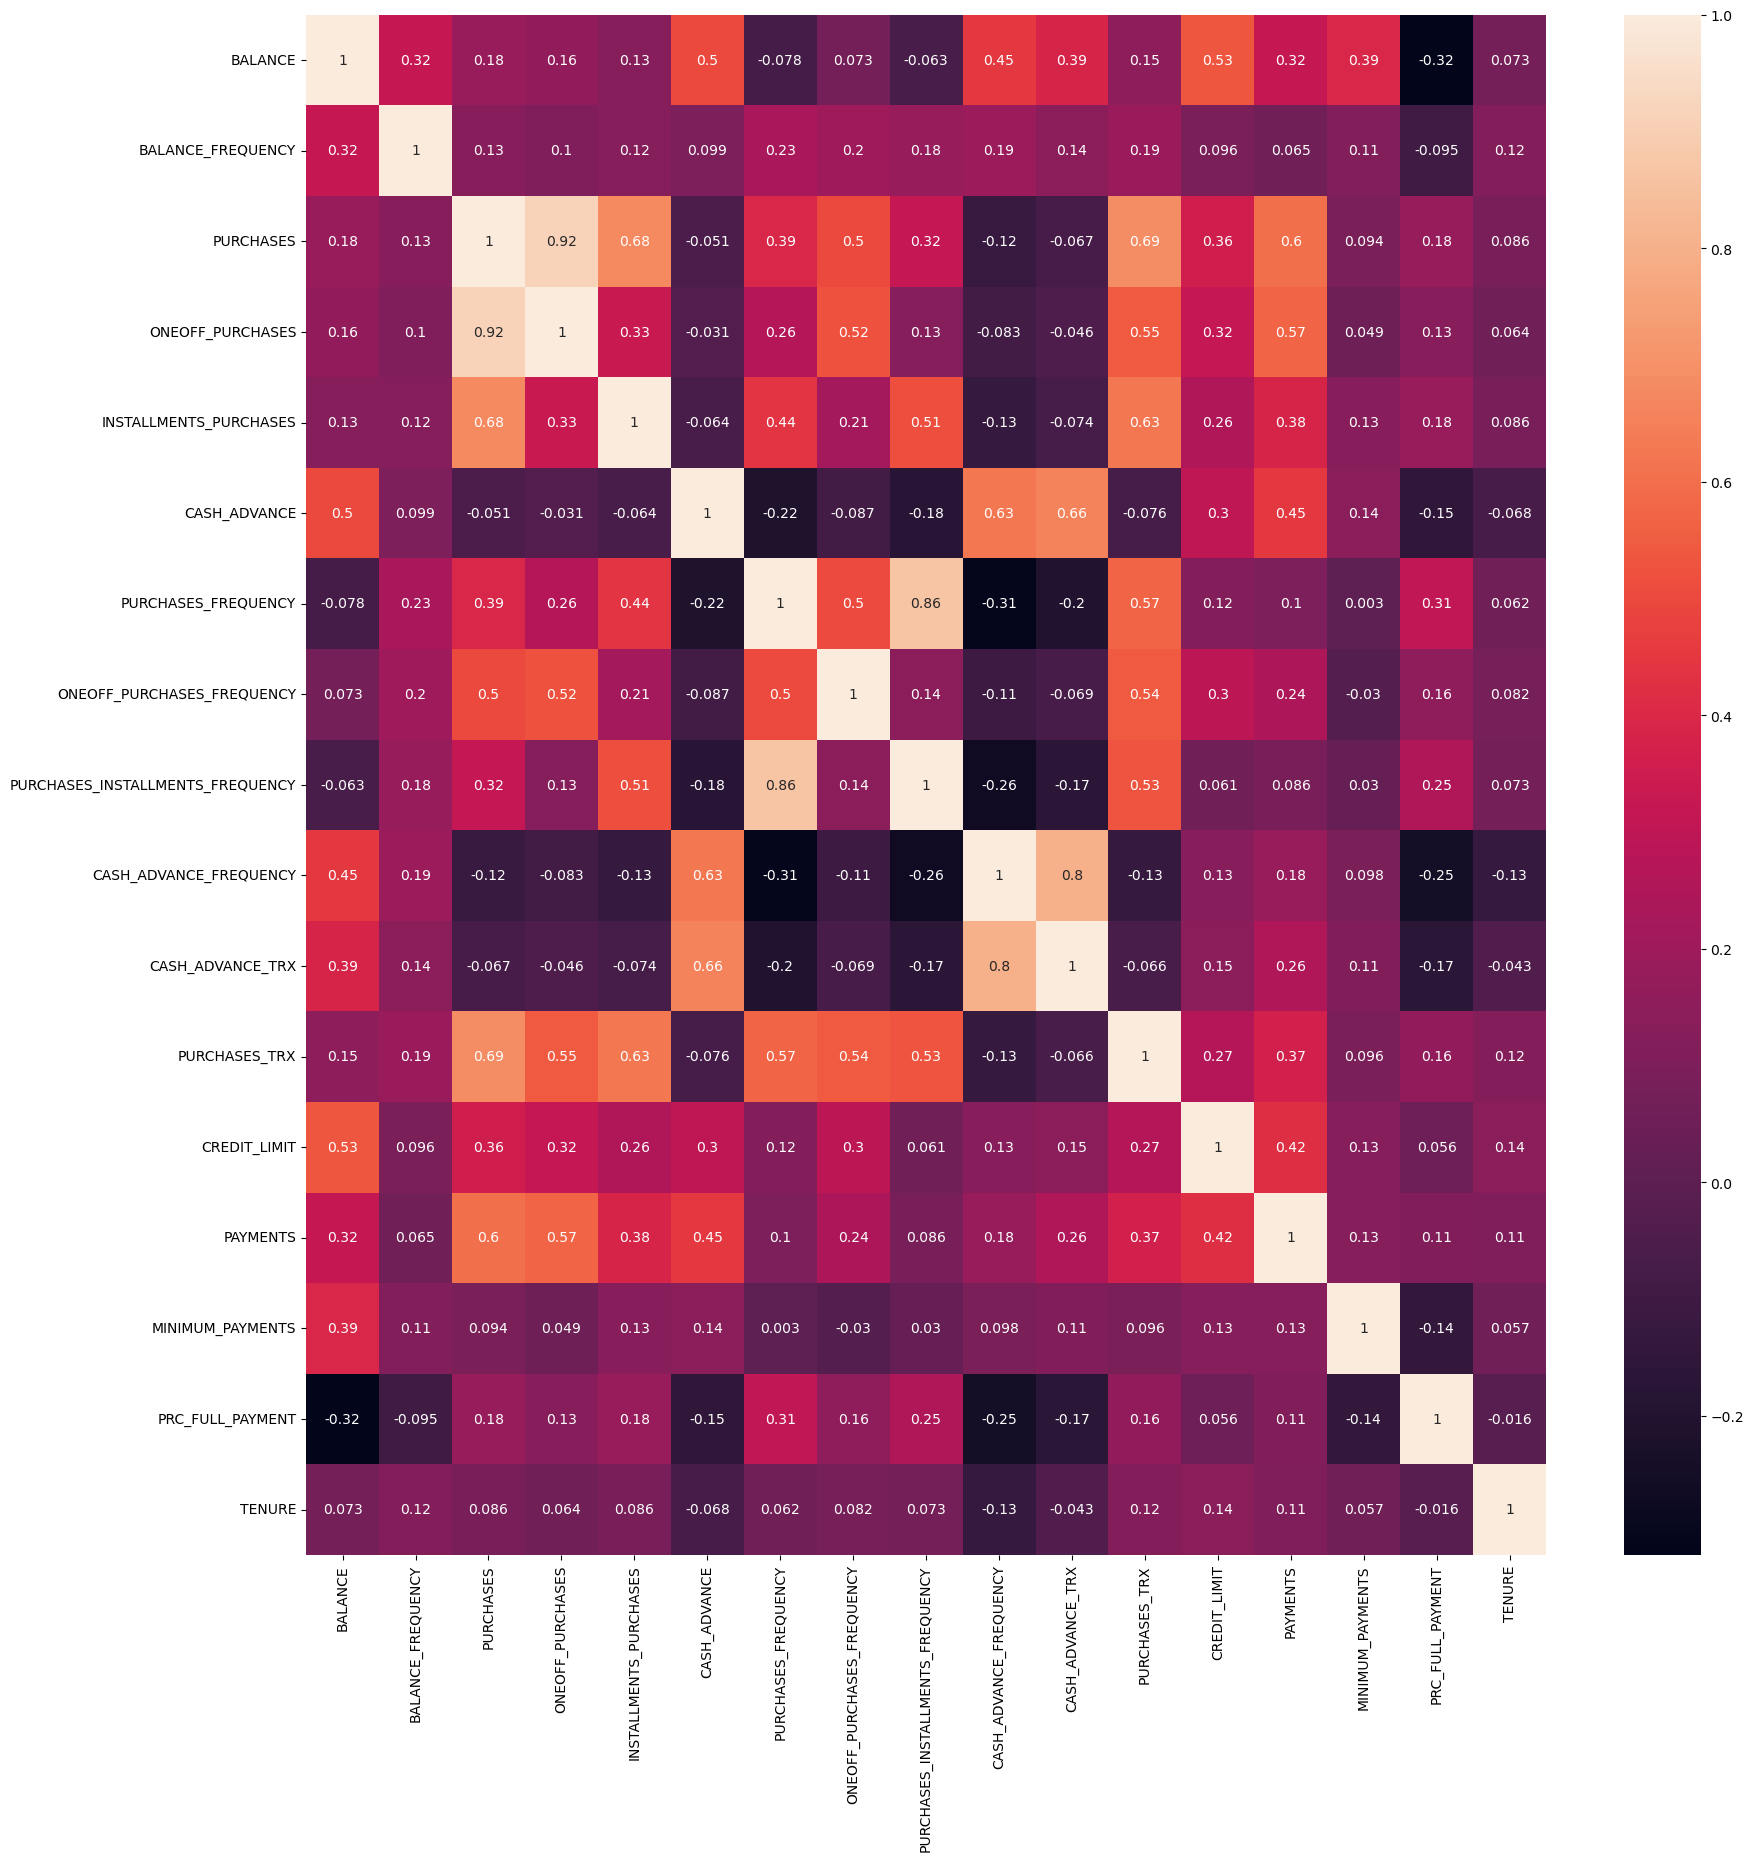

In [20]:
correlations = creditcard_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlations, annot = True)

* Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES
* Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
* 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments.
* Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


## The Theory & Intuition Behind K-Means

- K-means is an unsupervised learning algorithm (clustering).
- K-means works by grouping some data points together (clustering) in an unsupervised fashion.  
- The algorithm groups observations with similar attribute values together by measuring the Euclidian distance between points.


Steps:

1. Choose number of clusters “K”
2. Select random K points that are going to be the centroids for each cluster
3. Assign each data point to the nearest centroid, doing so will enable us to create “K” number of clusters 
4. Calculate a new centroid for each cluster
5. Reassign each data point to the new closest centroid
6. Go to step 4 and repeat.


## Find The Optimal Number of Clusters (Elbow Method)

In [21]:
# Scaling the data
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
creditcard_df_scaled.shape

(8950, 17)

In [22]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [23]:
scores = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    scores.append(kmeans.inertia_)

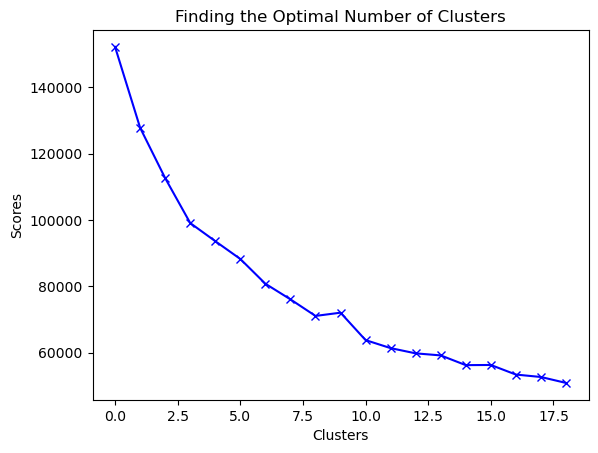

In [24]:
plt.plot(scores, 'bx-')
plt.title('Finding the Optimal Number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores');

* From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
* However, the values does not reduce linearly until 8th cluster.
* Let's choose the number of clusters to be 8.

## Apply K-Means Method

In [25]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [26]:
kmeans.cluster_centers_.shape

(8, 17)

In [27]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2.134505,0.459013,-0.219035,-0.183337,-0.181192,0.831974,-0.461967,-0.321754,-0.361529,0.687855,0.418543,-0.278691,1.202333,0.206238,1.455946,-0.508982,0.233432
1,1.187309,0.343073,-0.180448,-0.113075,-0.219054,2.404537,-0.421283,-0.113410,-0.391209,2.442097,2.616148,-0.218452,0.722946,1.047956,0.251475,-0.324946,-0.258952
2,-0.415852,0.306691,-0.059767,-0.255391,0.327839,-0.365330,0.986734,-0.410656,1.182789,-0.467401,-0.361452,0.139799,-0.320708,-0.244582,-0.121861,0.372066,-0.032459
3,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
4,-0.697692,-2.143745,-0.318265,-0.237119,-0.316801,-0.305396,-0.566146,-0.437353,-0.458660,-0.489636,-0.363376,-0.428055,-0.210414,-0.221437,-0.254979,0.254085,-0.150071
5,0.805306,0.465956,2.298535,1.812627,2.104850,-0.211404,1.165165,1.635466,1.216371,-0.325136,-0.225709,2.785060,1.219214,1.295440,0.247014,0.343654,0.332348
6,-0.091175,0.358181,-0.369313,-0.252834,-0.408643,-0.067342,-0.882828,-0.413593,-0.774299,0.168322,-0.004113,-0.494360,-0.397910,-0.273107,-0.107654,-0.449967,-0.028664
7,-0.179803,0.384585,0.428357,0.562875,-0.021368,-0.335288,0.925823,1.833033,0.090991,-0.403871,-0.323257,0.505844,0.344212,0.066624,-0.168999,0.371018,0.184973


In [28]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6007.265925,0.986007,535.232246,288.135779,247.217754,2723.559602,0.304941,0.106472,0.220756,0.272791,6.105072,7.782609,8869.029974,2330.182446,4257.227472,0.004846,11.829710
1,4035.758289,0.958541,617.674806,404.756162,212.979771,6021.297807,0.321269,0.168625,0.208961,0.623833,21.102113,9.279930,7124.823944,4766.874474,1450.257729,0.058674,11.170775
2,698.913975,0.949923,875.512486,168.540812,707.528242,212.757753,0.886375,0.079951,0.834508,0.041613,0.782183,18.184701,3327.583201,1025.101886,580.214942,0.262538,11.473881
3,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
4,112.287984,0.369437,323.225824,198.868336,124.588281,338.441609,0.263129,0.071987,0.182154,0.037163,0.769051,4.069984,3728.875501,1092.104008,269.987819,0.228030,11.316485
5,3240.650428,0.987651,5914.061256,3601.026114,2314.456943,535.547609,0.957987,0.690349,0.847854,0.070081,1.708531,83.936019,8930.450237,5483.316598,1439.861966,0.254228,11.962085
6,1374.701163,0.962120,214.162586,172.784658,41.536944,837.651124,0.136029,0.079075,0.056711,0.168827,3.220756,2.421897,3046.689253,942.525296,613.323754,0.022107,11.478959
7,1190.230324,0.968375,1918.396591,1526.694379,391.745044,275.756721,0.861928,0.749287,0.400600,0.054325,1.042832,27.283217,5746.834870,1926.014729,470.361967,0.262231,11.764860


* First Customers cluster (Transactors): Those are customers who pay least amount of interest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
* Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
* Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
* Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance

In [29]:
labels.shape
# Number of samples

(8950,)

In [30]:
print(labels.max())
print(labels.min())
# This let me know the range of the clusters. I can see that the clusters range from 0 to 7, which is 8 clusters in total

7
0


In [31]:
# Concatenate the clusters labels to our original dataframe
credditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
credditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


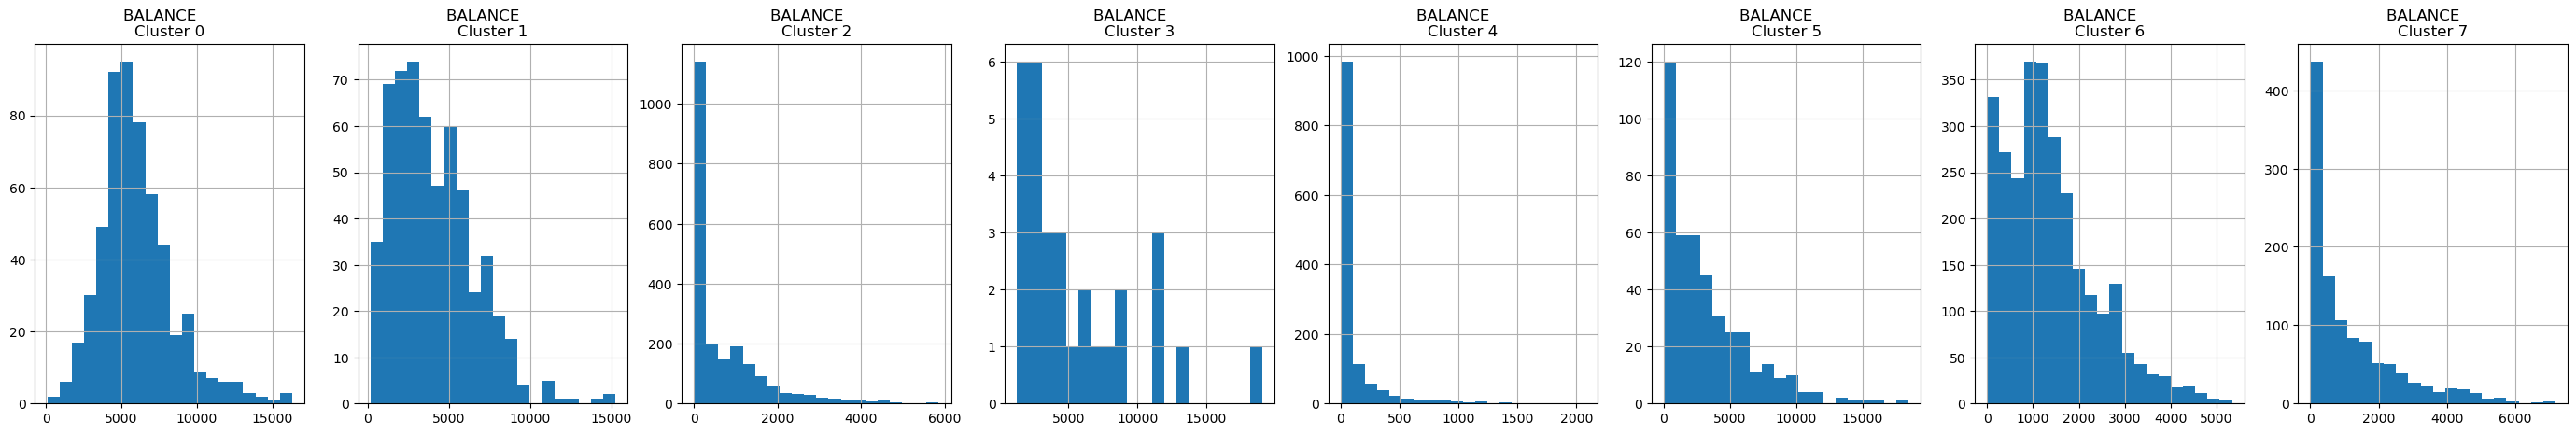

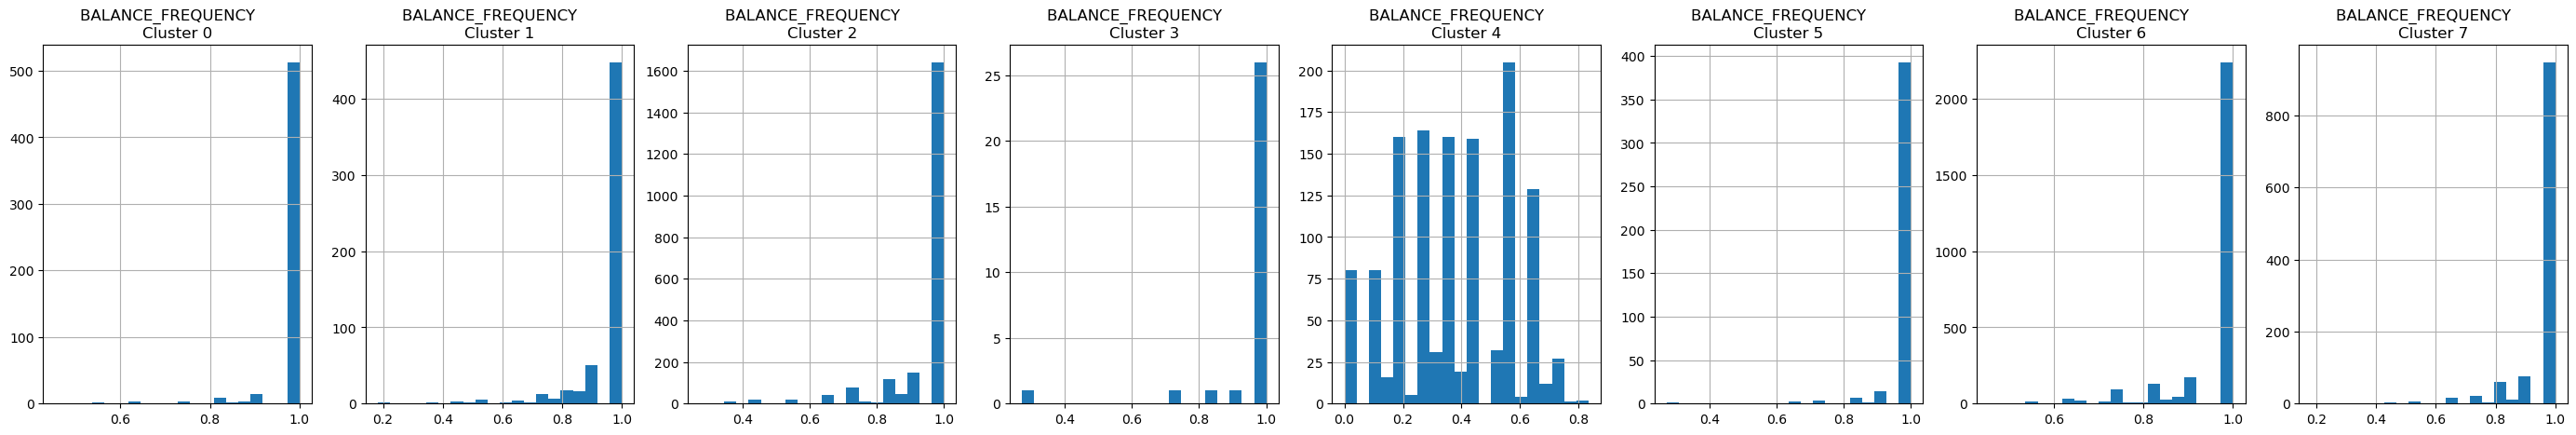

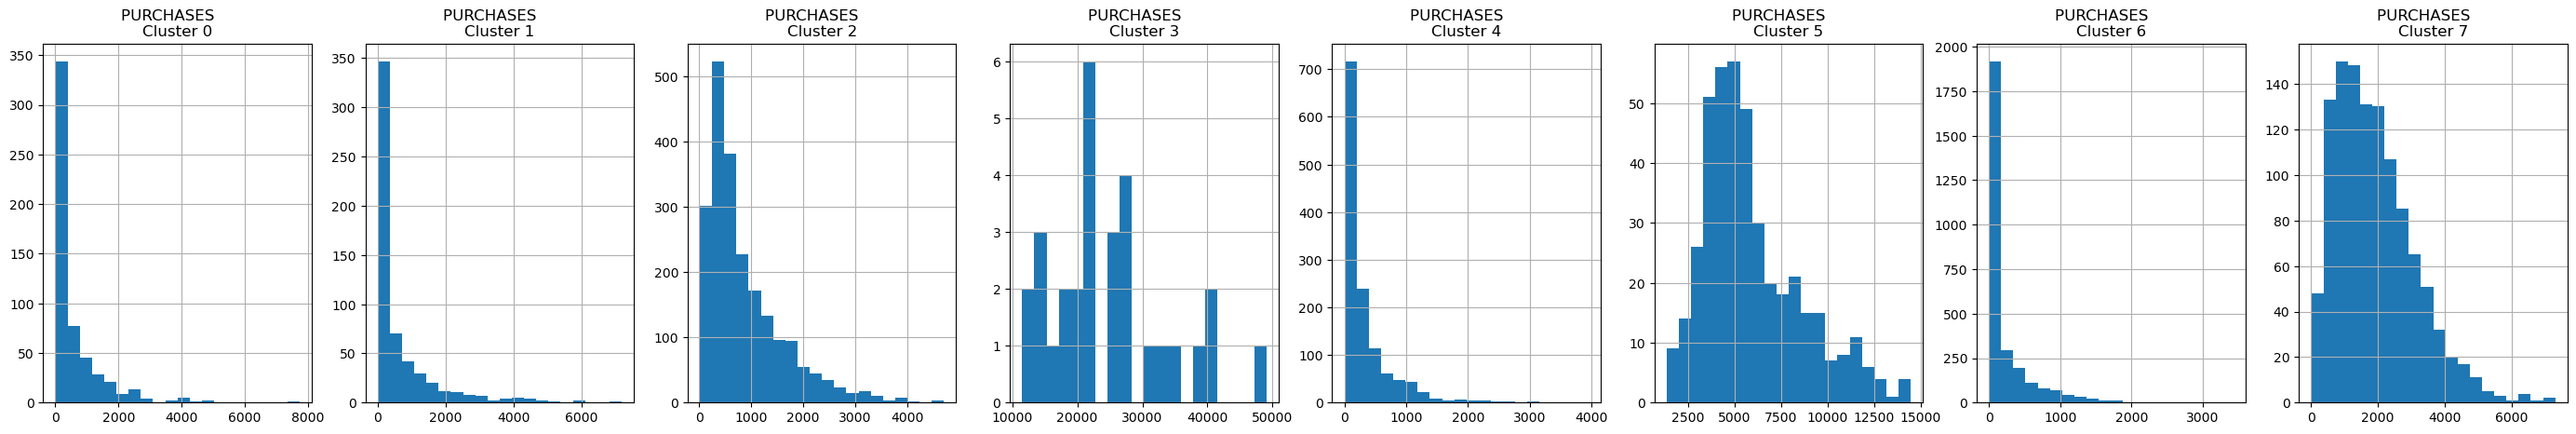

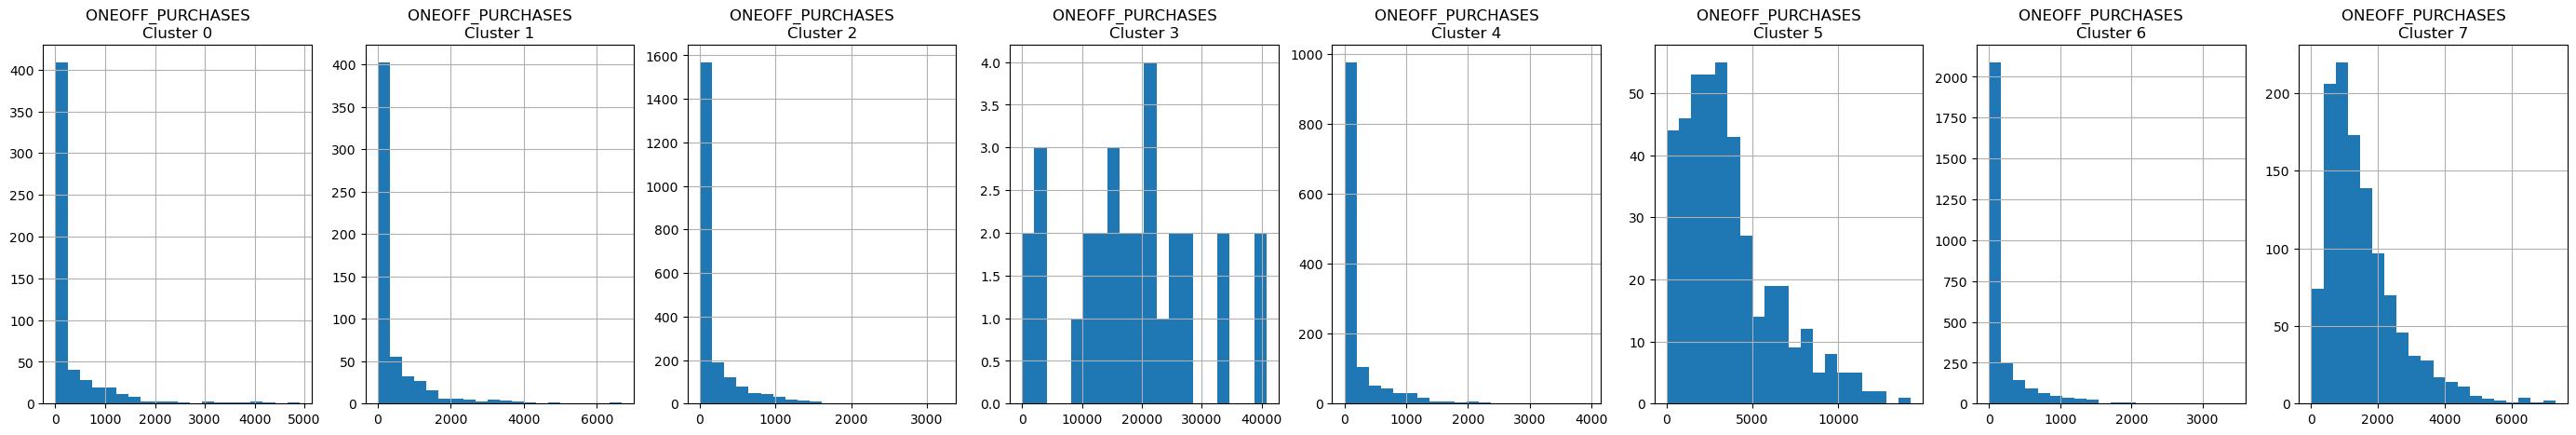

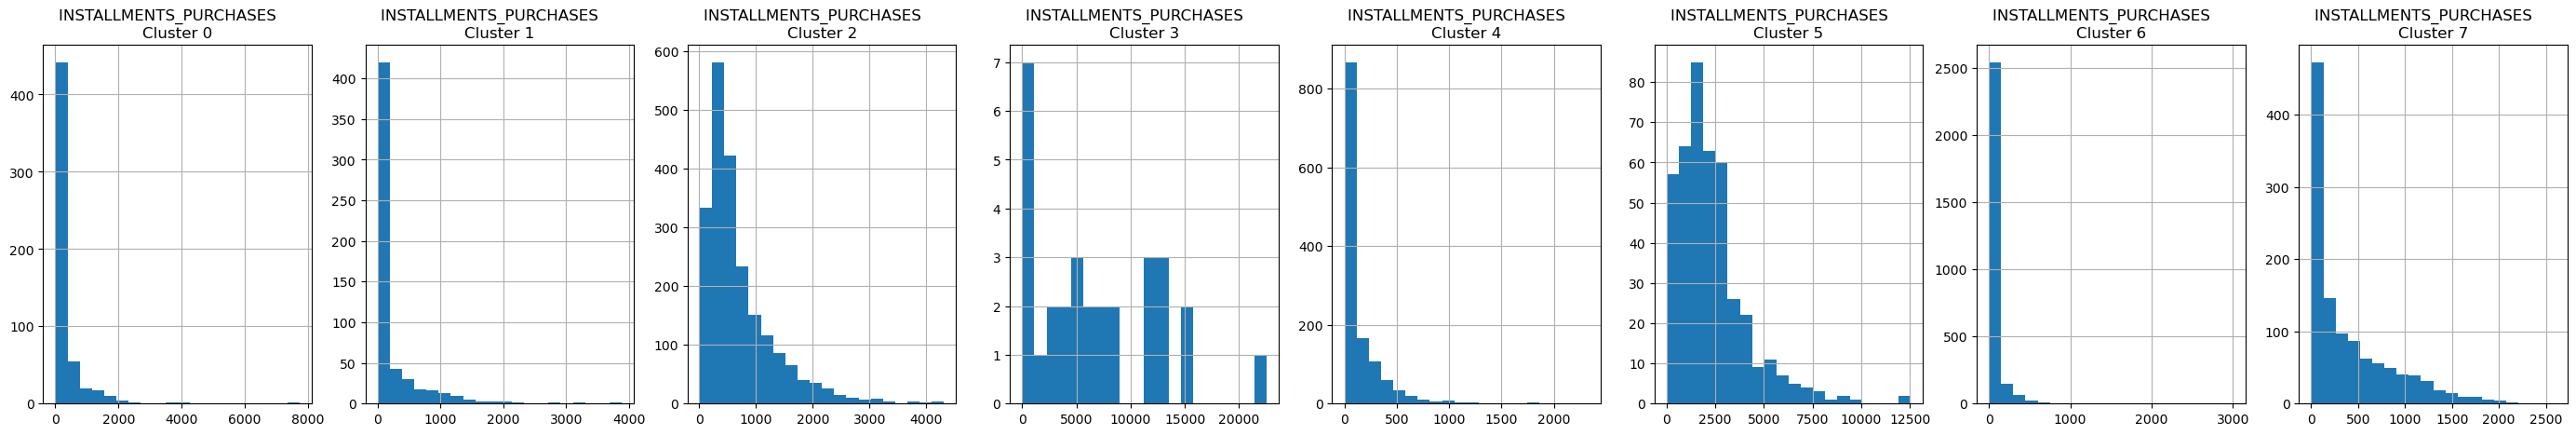

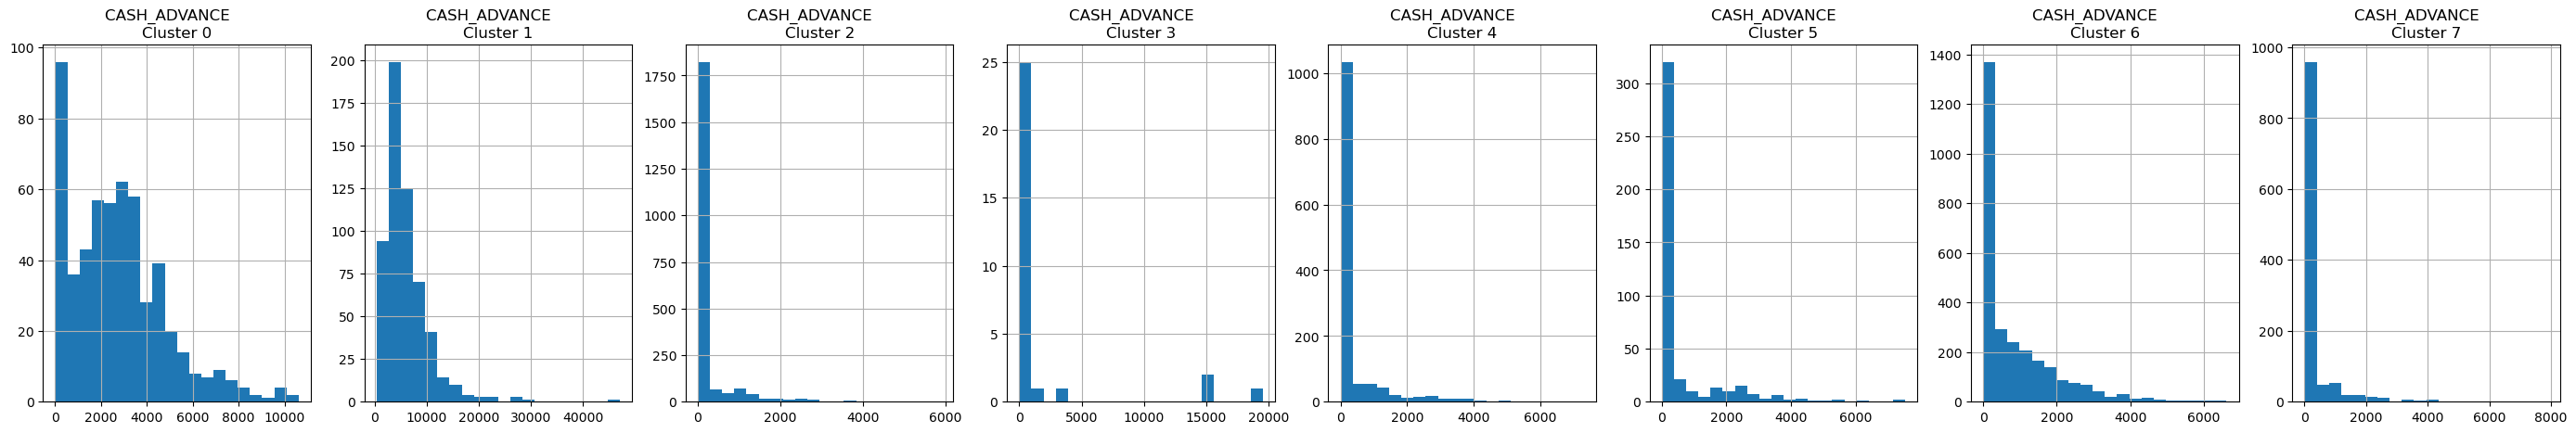

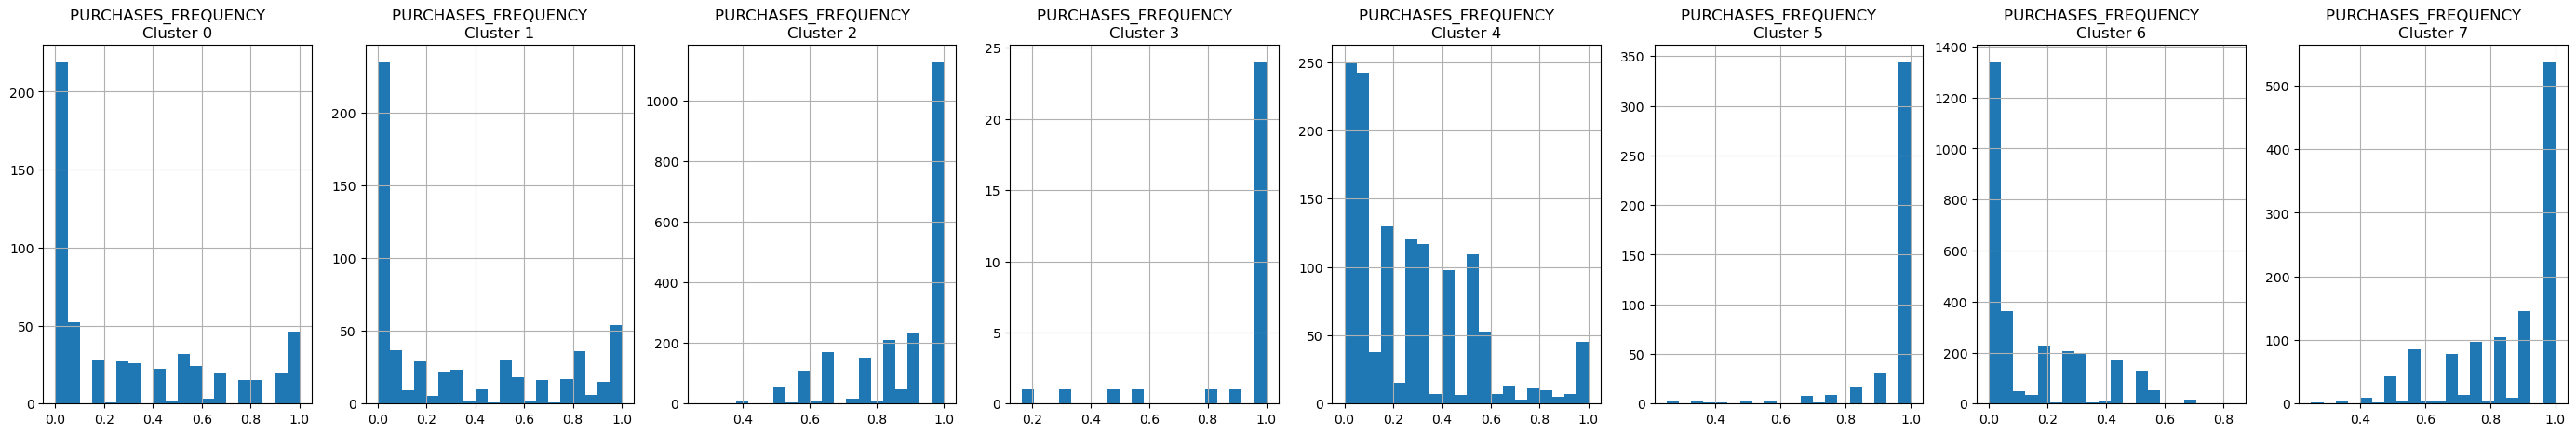

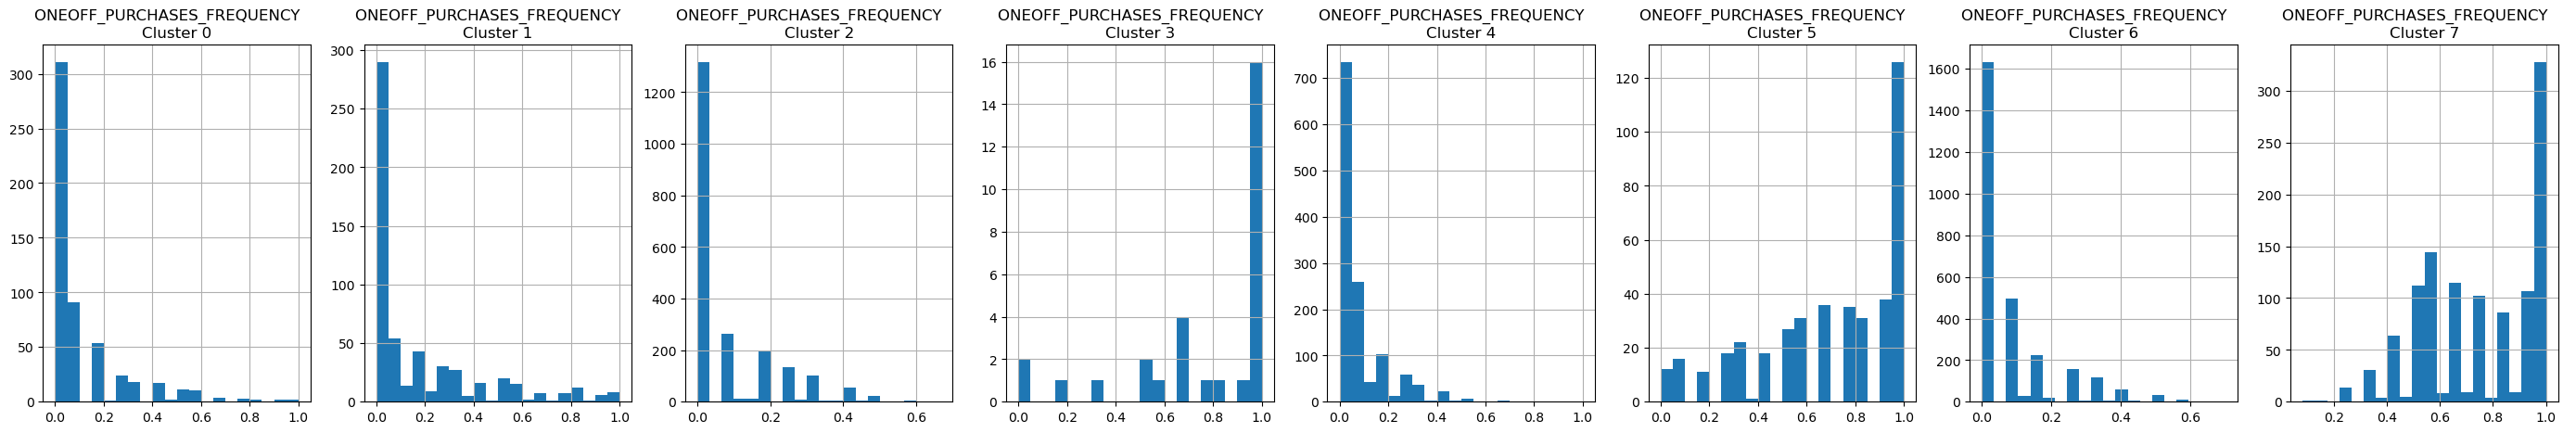

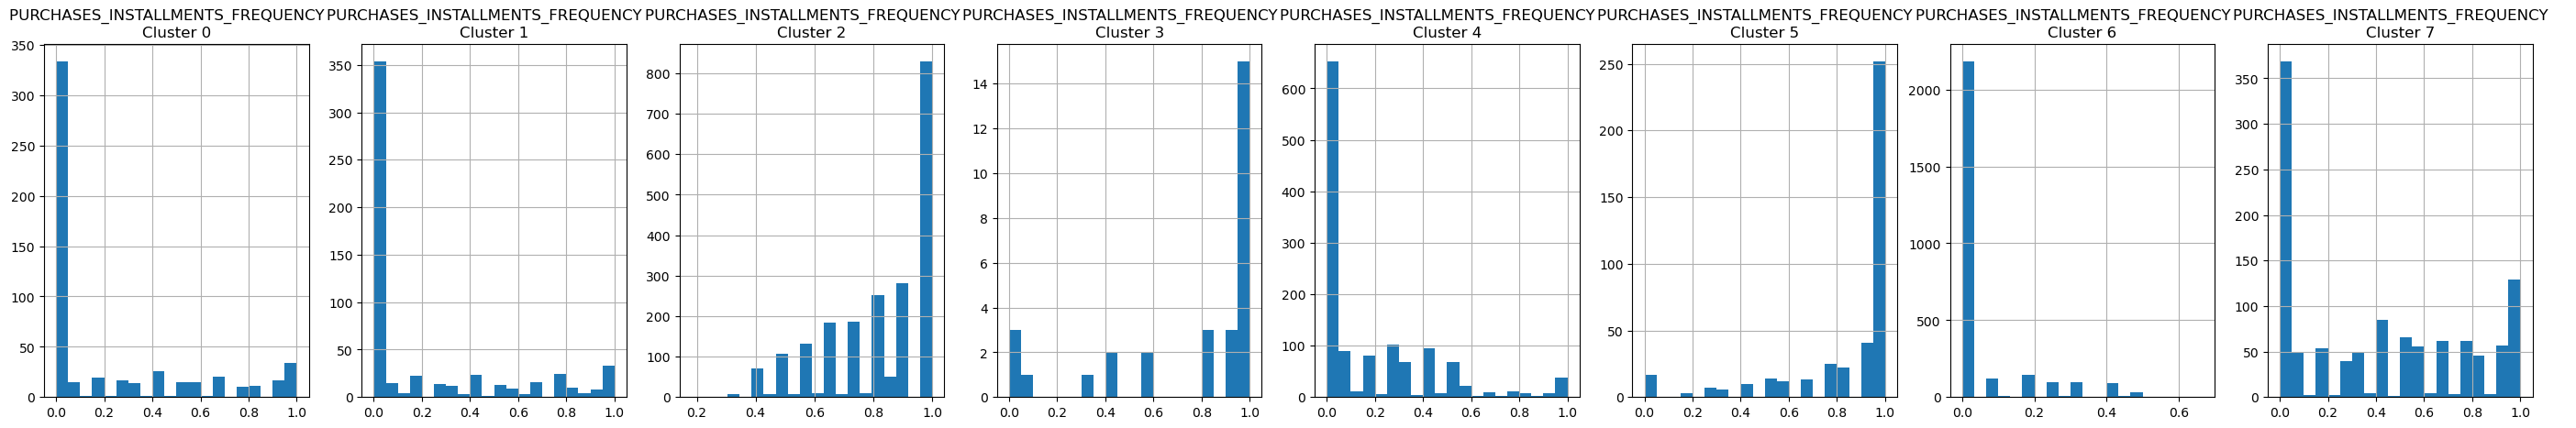

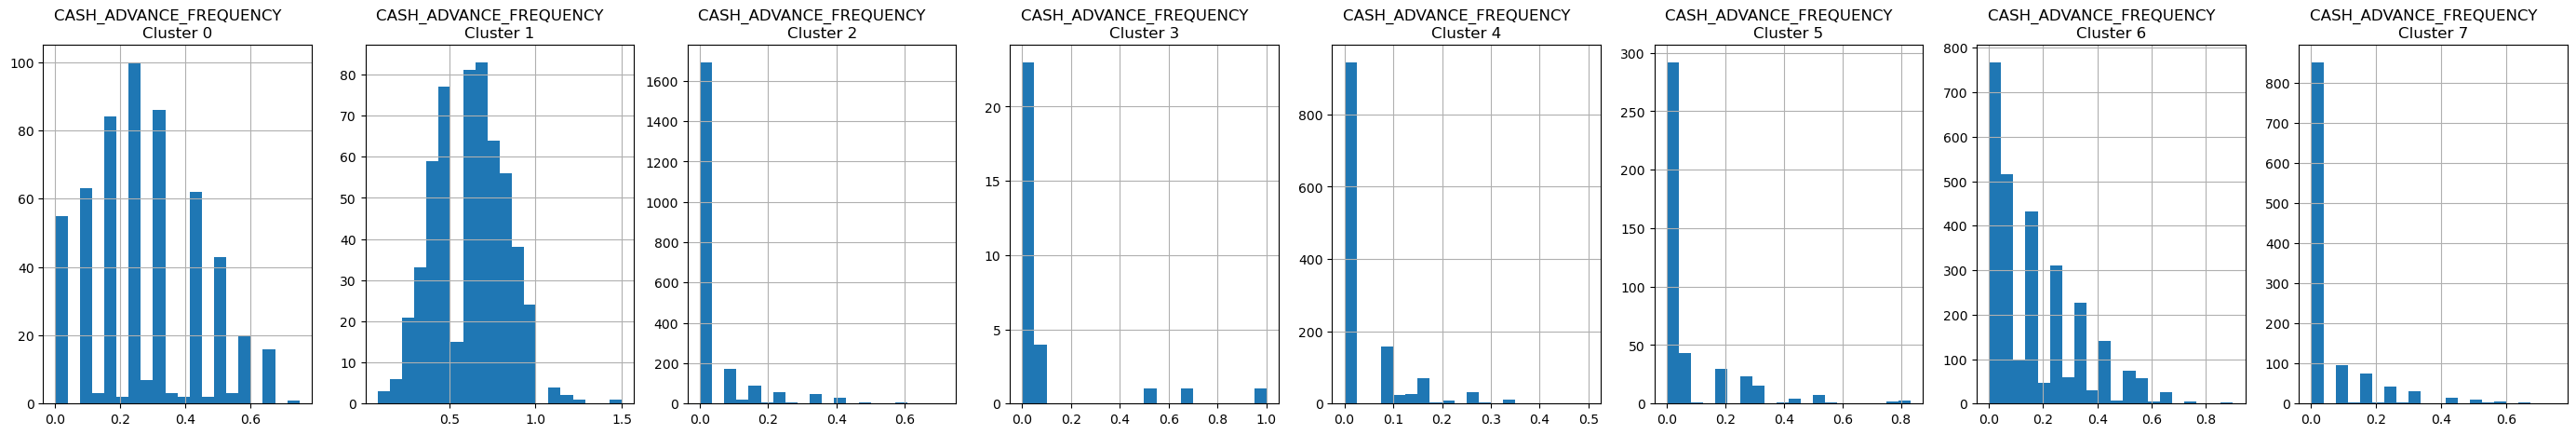

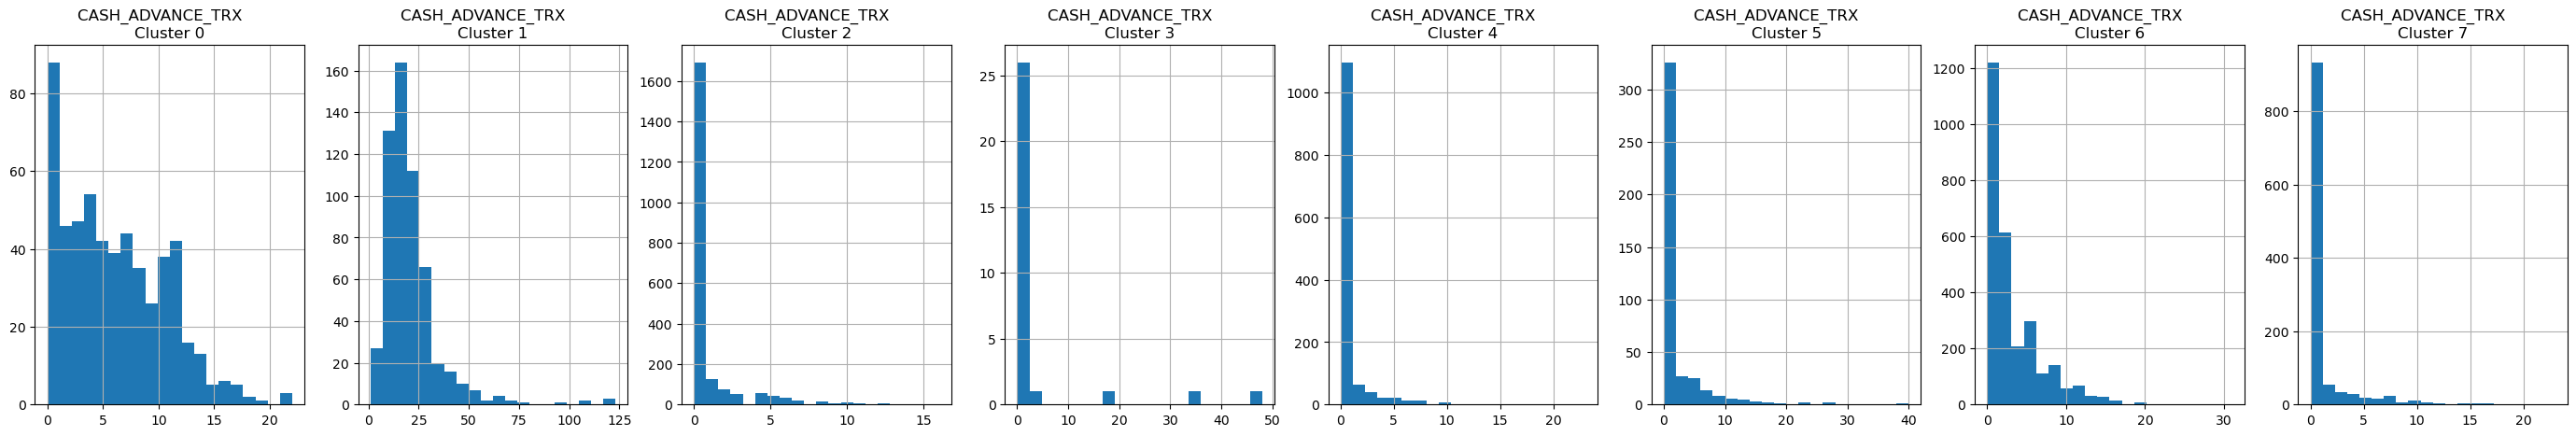

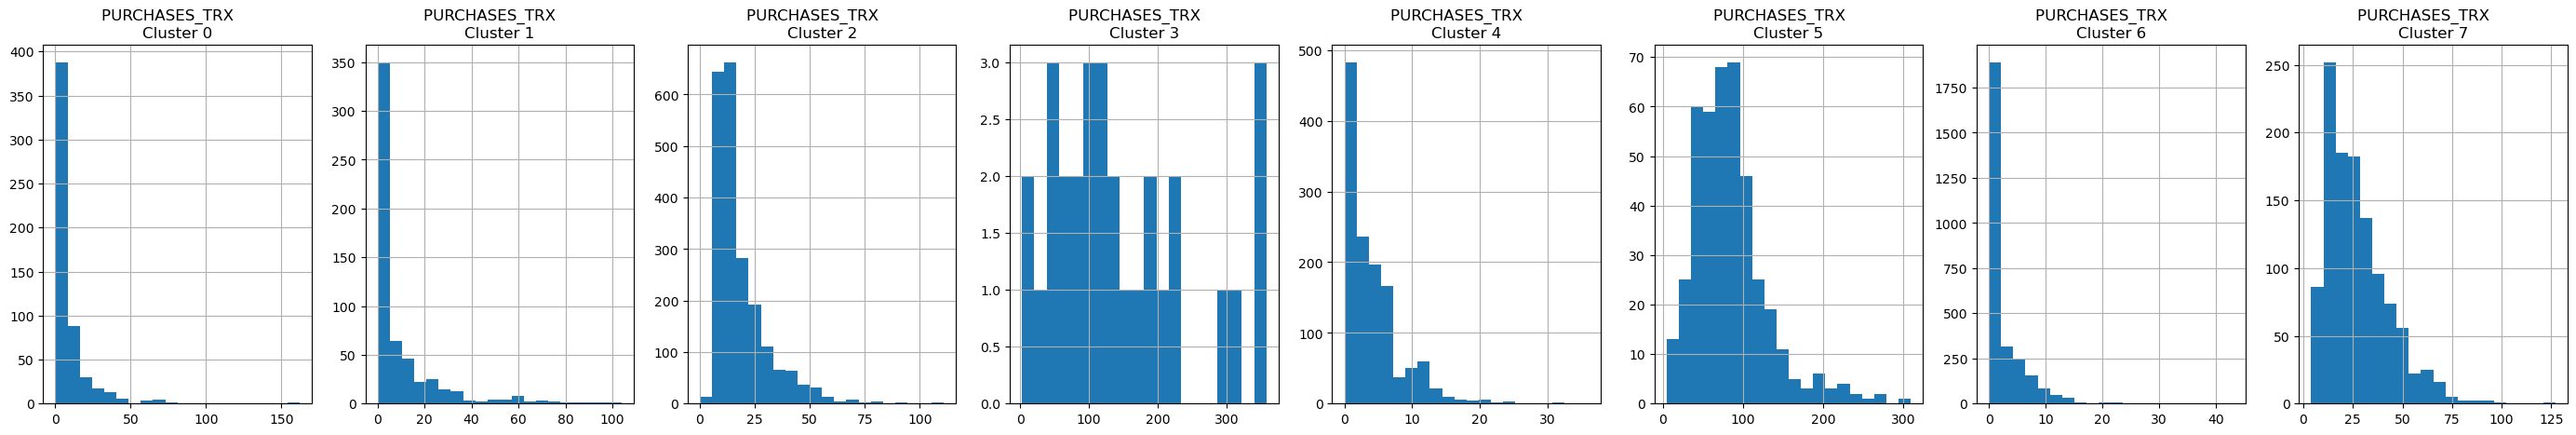

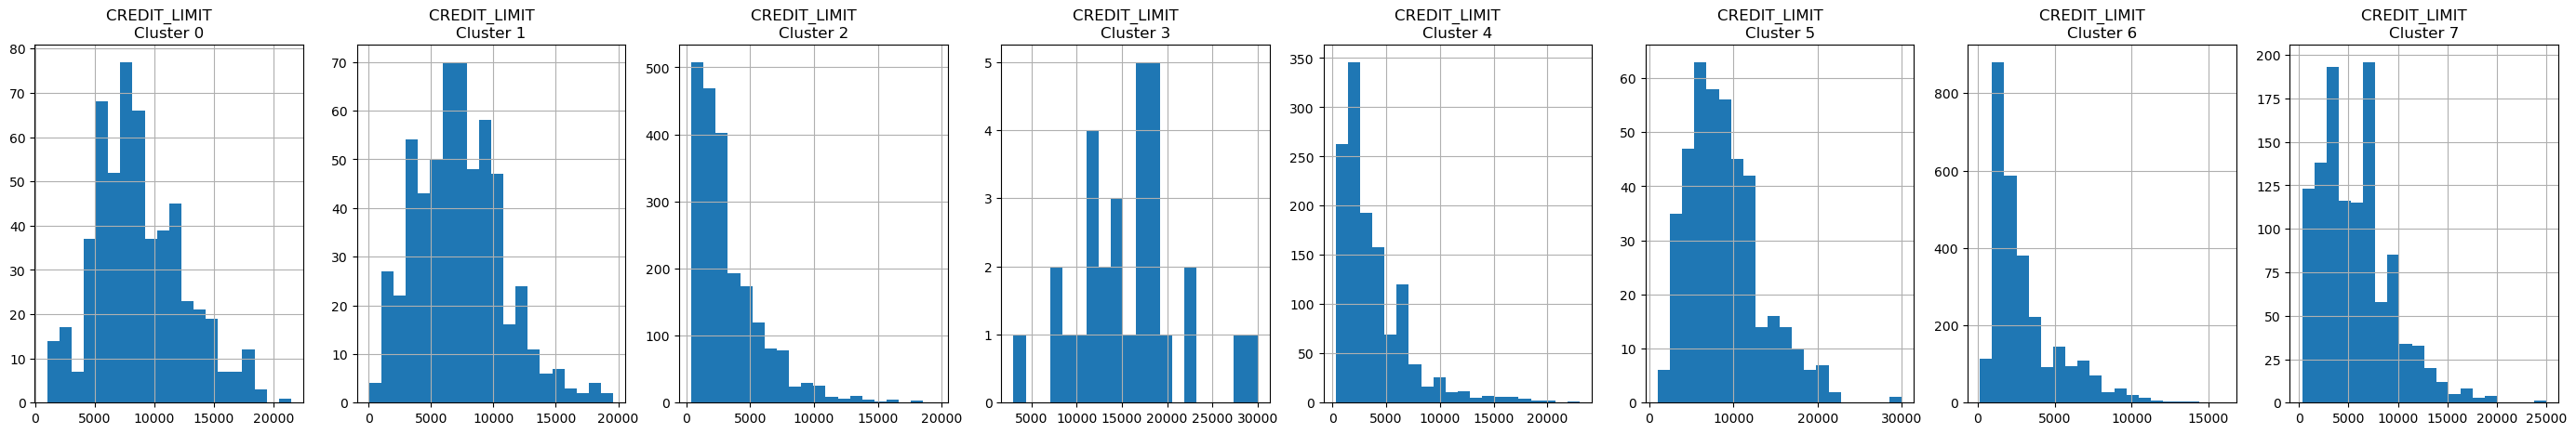

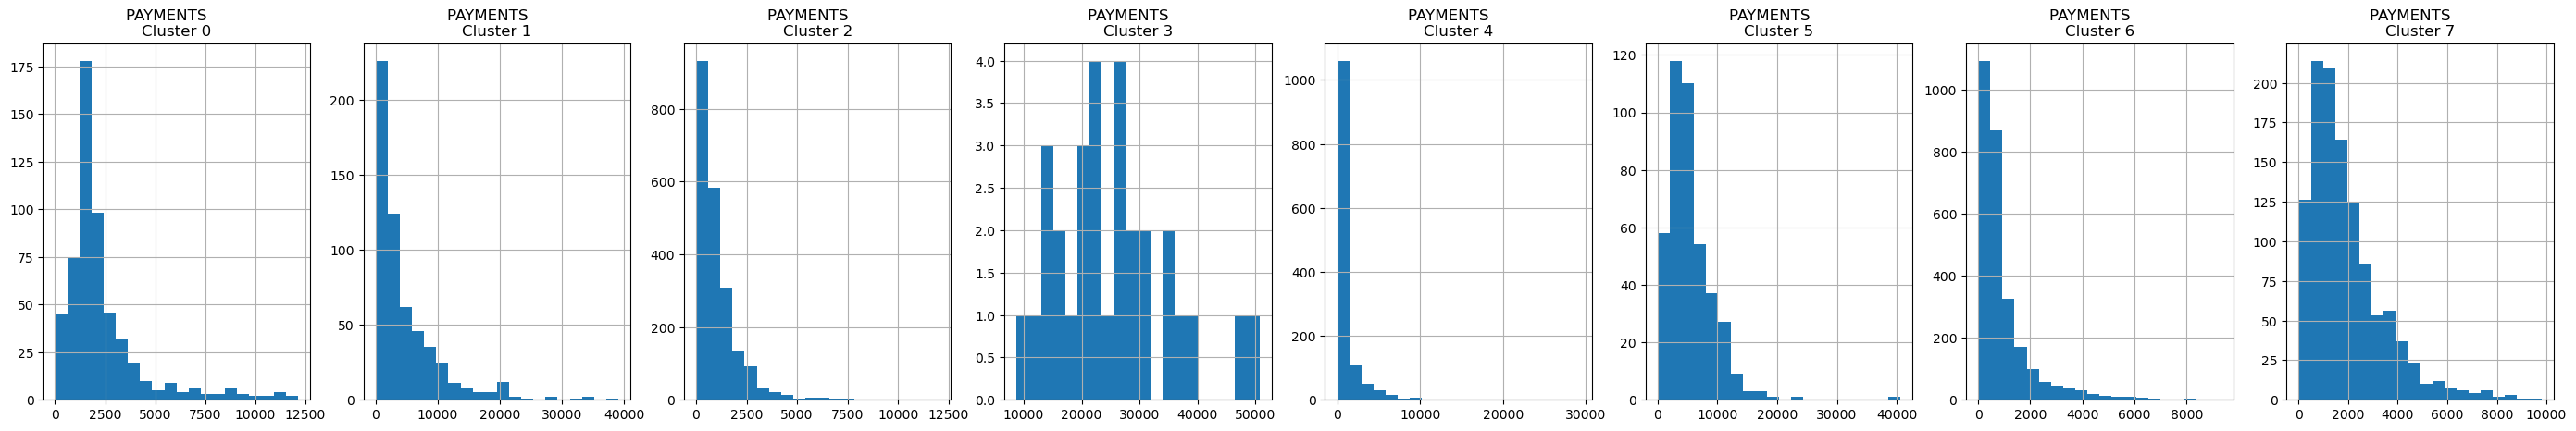

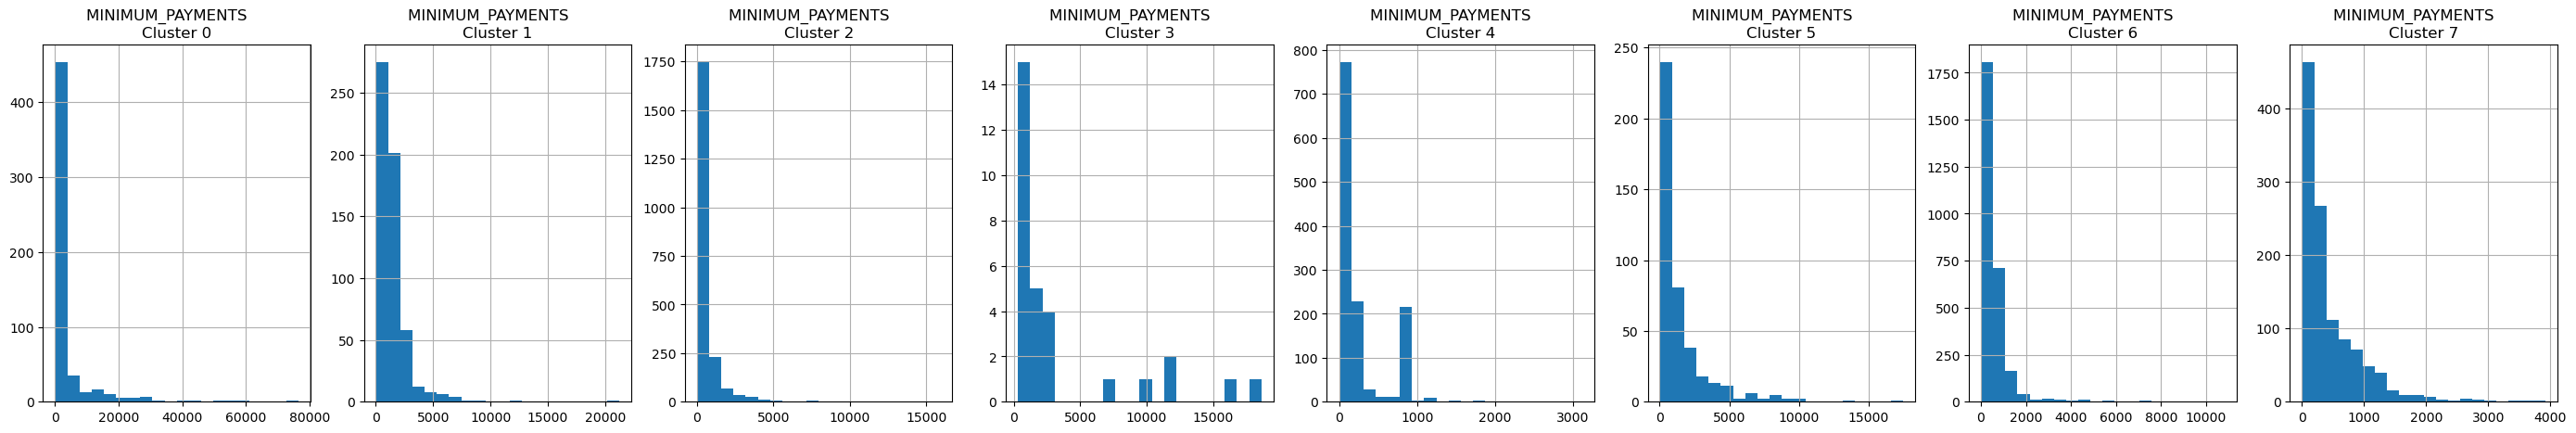

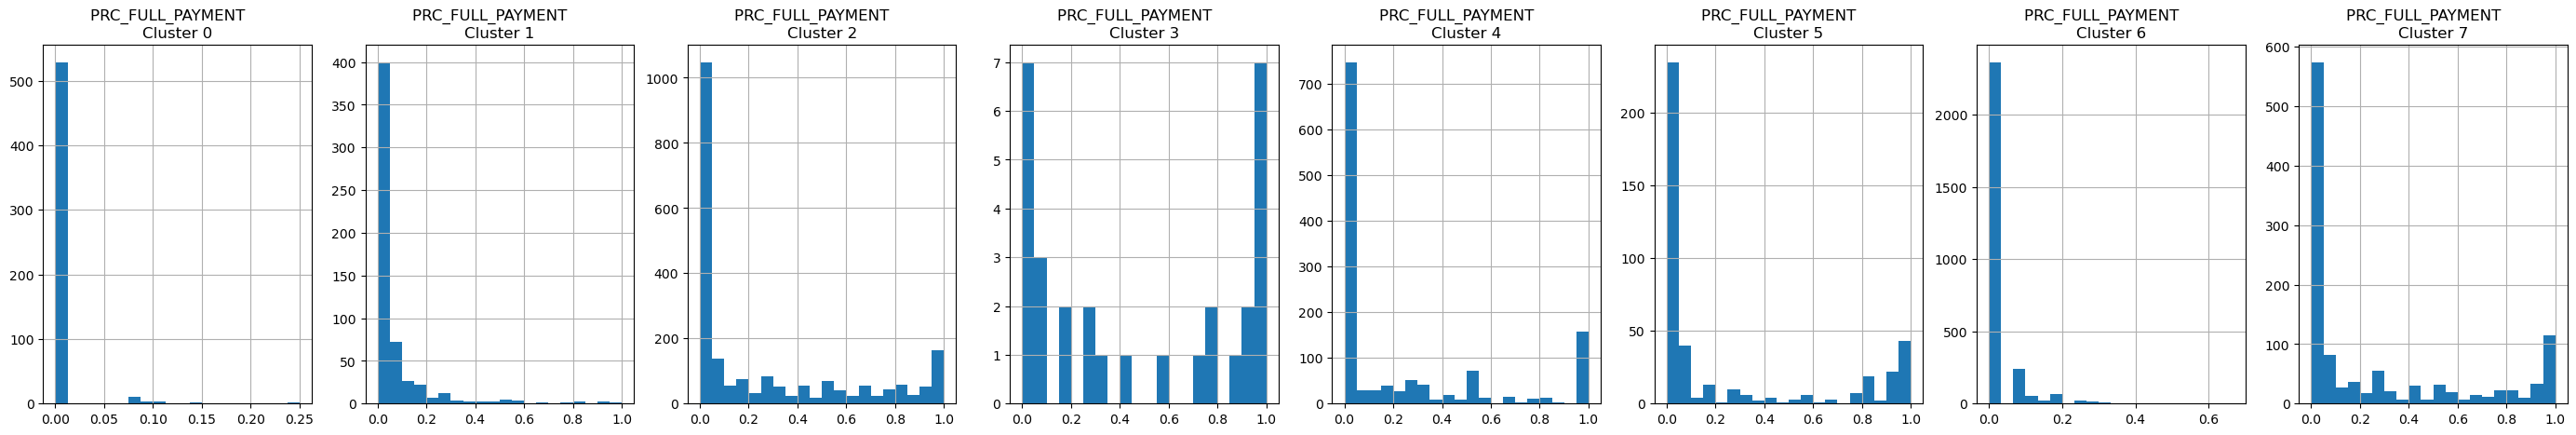

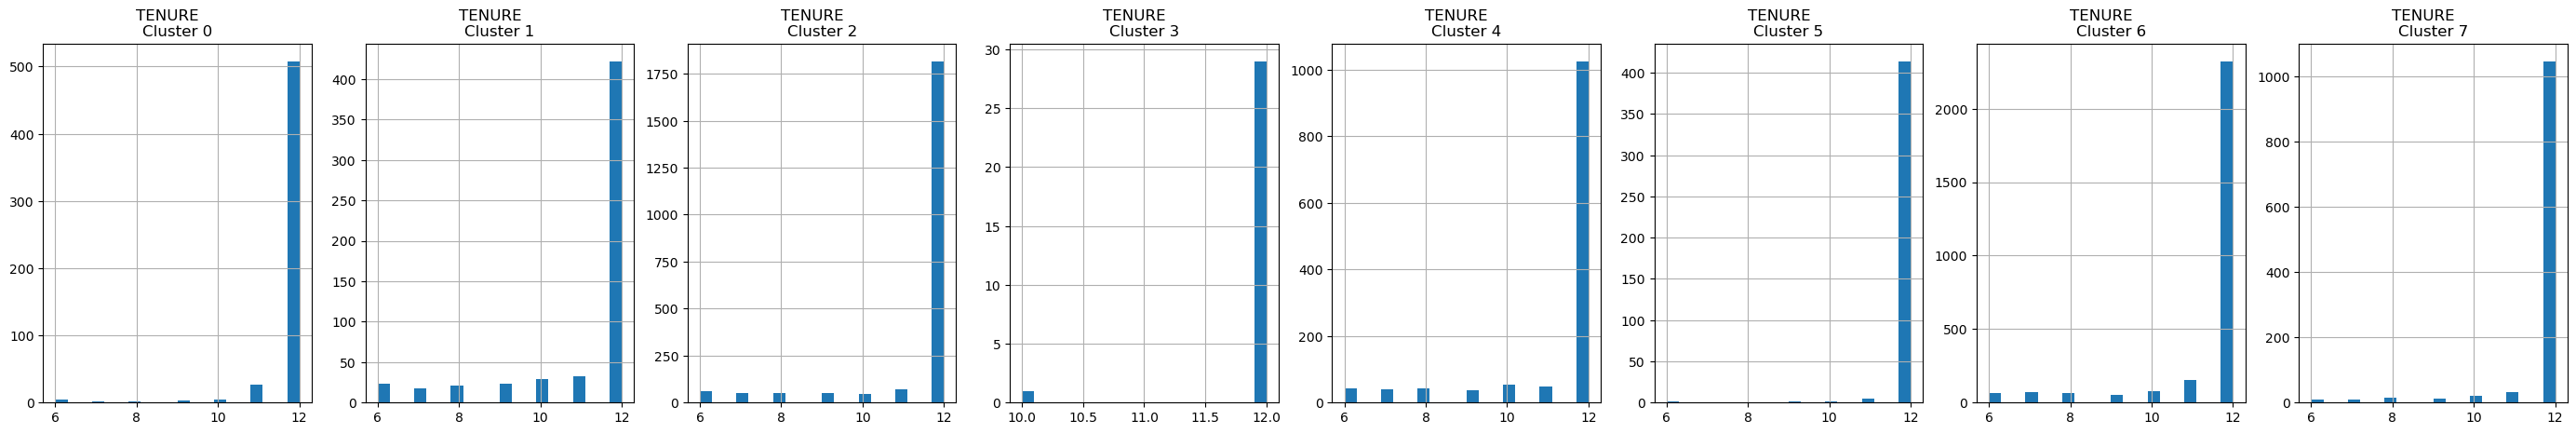

In [32]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
    plt.figure(figsize = (35, 5))

    for j in range(8):
        plt.subplot(1, 8, j + 1)
        cluster = credditcard_df_cluster[credditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {}'.format(i, j))

plt.show()

## Apply Principal Component Analysis & Visualize The Results

### Principal Component Analysis Overview

- PCA is an unsupervised machine learning algorithm.
- PCA performs dimensionality reductions while attempting at keeping the original information unchanged. 
- PCA works by trying to find a new set of features called components.
- Components are composites of the uncorrelated given input features.

In [33]:
# Obtain the principal components
pca  = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]])

In [34]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581


In [35]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,6
1,-1.138295,2.506477,0
2,0.969684,-0.383520,7
3,-0.873628,0.043166,6
4,-1.599434,-0.688581,6


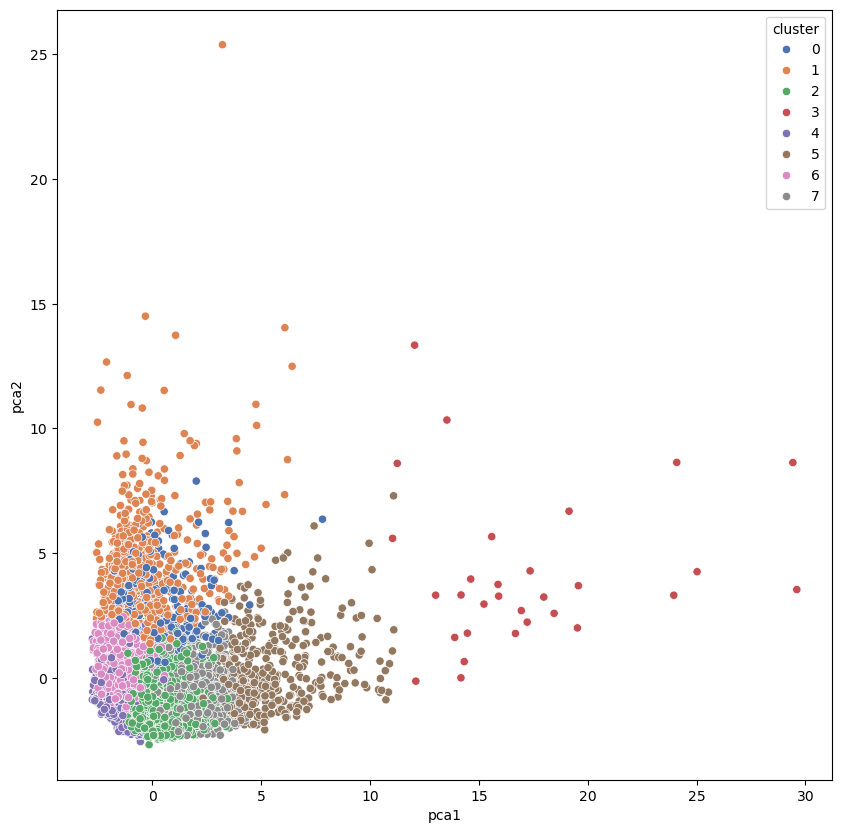

In [36]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'pca1', y ='pca2', hue = 'cluster', data = pca_df, palette = 'deep');

## The Theory & Intuition Behind Autoencoders

- Auto encoders are a type of Artificial Neural Networks that are used to perform a task of data encoding (representation learning). 
- Auto encoders use the same input data for the input and output.

### The Code Layer

- Auto encoders work by adding a bottleneck in the network.
- This bottleneck forces the network to create a compressed (encoded) version of the original input
- Auto encoders work well if correlations exists between input data (performs poorly if the all input data is independent) 


## Apply Autoencoders (Perform Dimensionality Reduction Using Autoencoders)

In [37]:
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [38]:
input_df = Input(shape = (17,))

x = Dense(7, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# Autoencoder
autoencoder = Model(input_df, decoded)

# Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [39]:
creditcard_df_scaled.shape

(8950, 17)

In [40]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.6957
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3929
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2635
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2275
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2100
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1778
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1541
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1329
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1295
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1185
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1164
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1088
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0992
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0958
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0916
Epoc

In [41]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2000)           │     1,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        20,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2000)           │        22,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │     1,000,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 17)             │         8,517 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,922,961 (26.41 MB)

 Trainable params: 2,307,653 (8.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,615,308 (17.61 MB)

In [42]:
pred = encoder.predict(creditcard_df_scaled)
pred.shape

280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


(8950, 10)

In [43]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    scores_1.append(kmeans.inertia_)

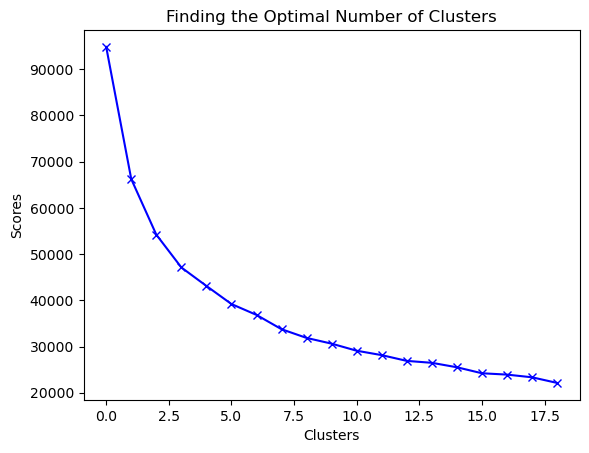

In [44]:
plt.plot(scores_1, 'bx-')
plt.title('Finding the Optimal Number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores');

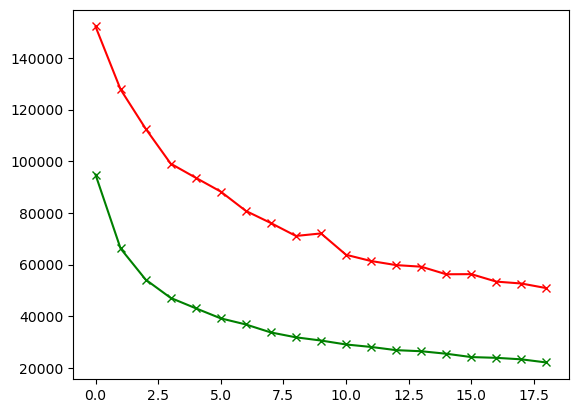

In [45]:
plt.plot(scores, 'bx-', color = 'r', label = 'Normal')
plt.plot(scores_1, 'bx-', color = 'g', label = 'Autoencoder');

In [46]:
kmeans = KMeans(5)
kmeans.fit(pred)
labels = kmeans.labels_

In [47]:
# Concatenate the clusters labels to our original dataframe
credditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1) 
credditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [48]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])

In [49]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.321507,0.145393,3
1,2.333434,1.966187,2
2,-1.061591,-0.815836,3
3,-1.034784,0.108954,3
4,-2.174801,0.110461,3


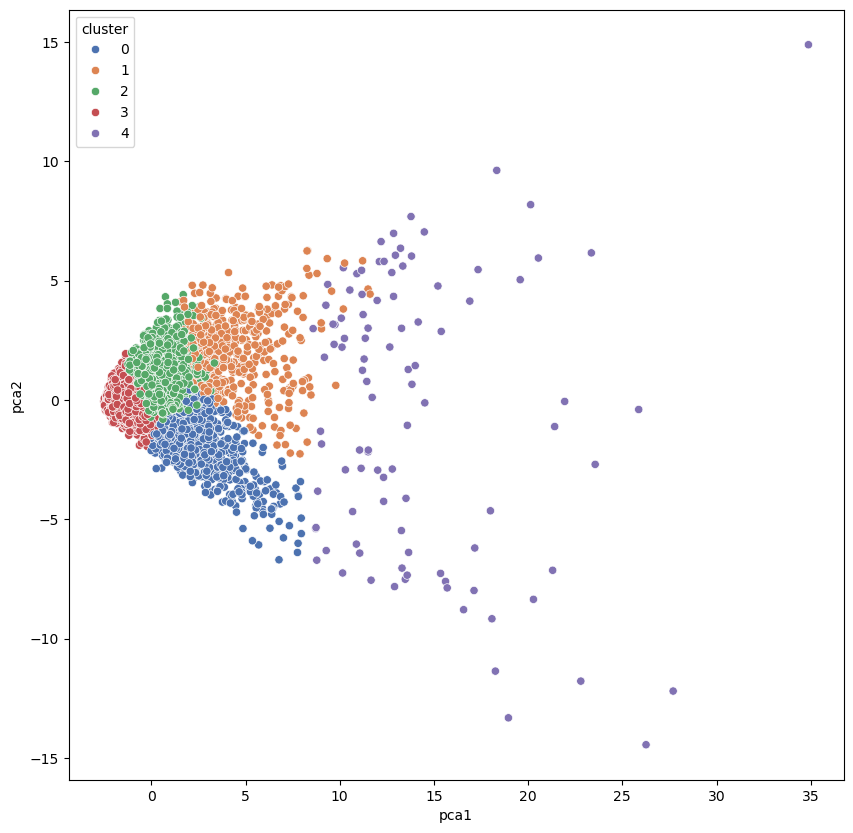

In [50]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = 'deep');

## Recommendations for the Marketing Department

1. **Target Audience Segmentation**: Refine audience segmentation to ensure marketing efforts are directed towards the most profitable and engaged customer segments. Use data to identify key demographics, behaviors, and preferences.

2. **Content Marketing Strategy**: Develop a robust content marketing strategy that includes creating high-quality, relevant content tailored to the needs and interests of your target audience. This can improve engagement and brand loyalty.

3. **Digital Marketing Channels**: Increase investment in digital marketing channels such as social media, email marketing, and search engine optimization (SEO) to reach a broader audience and drive more traffic to your website.

4. **Market Research**: Continuously conduct market research to stay informed about industry trends, competitor activities, and changing customer preferences. This can help in adapting marketing strategies to stay competitive.

By implementing these recommendations, the Marketing Department can enhance its effectiveness, appeal to the current audience base, and achieve better overall results from its marketing efforts.